In [18]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import pandas as pd


In [19]:
digit_mnist = keras.datasets.mnist

In [20]:
(x_train,y_train),(x_test,y_test) = digit_mnist.load_data()

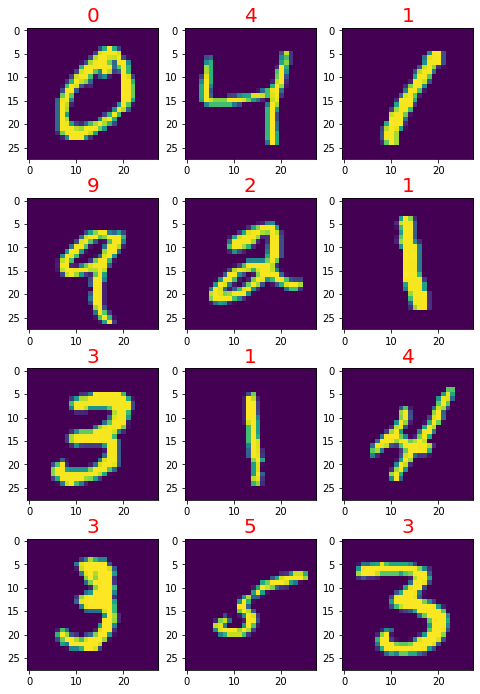

In [21]:
figure = plt.figure(figsize=(8,12))
row = 4 
col = 3 
for i in range(1,row*col+1):
  image = x_train[i]
  title = y_train[i]
  figure.add_subplot(row,col,i)
  plt.imshow(image)
  plt.title(title,fontsize = 20,color = 'red')

In [22]:

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [24]:
x_train = x_train/255.
x_test = x_test/255

In [25]:
x_train , x_valid = x_train[6000:],x_train[:6000]
y_train , y_valid = y_train[6000:],y_train[:6000]

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape =(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation='relu' ))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               1081800   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,103,230
Trainable params: 1,103,230
Non-trainable params: 0
____________________________________________

In [28]:
model.compile(optimizer='sgd',
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

In [29]:
trained_model = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4929 - accuracy: 0.8651 - val_loss: 0.2320 - val_accuracy: 0.9337
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2033 - accuracy: 0.9392 - val_loss: 0.1674 - val_accuracy: 0.9517
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1497 - accuracy: 0.9556 - val_loss: 0.1482 - val_accuracy: 0.9543
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9635 - val_loss: 0.0999 - val_accuracy: 0.9718
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1026 - accuracy: 0.9691 - val_loss: 0.0931 - val_accuracy: 0.9725
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9732 - val_loss: 0.0864 - val_accuracy: 0.9753
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0778 - accuracy: 0.9766 - val_loss: 0.0871 - val_accuracy:

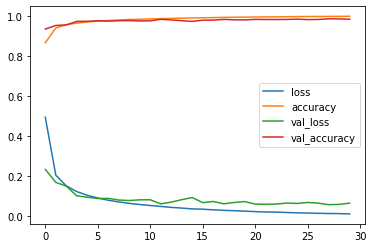

In [44]:
pd.DataFrame(trained_model.history).plot()

In [46]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9842


[0.0571855790913105, 0.9842000007629395]

In [38]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu',input_shape =(28,28,1)))
model_b.add(keras.layers.MaxPool2D(2,2))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200,activation='relu' ))
model_b.add(keras.layers.Dense(100,activation='relu'))
model_b.add(keras.layers.Dense(10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               1081800   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,103,230
Trainable params: 1,103,230
Non-trainable params: 0
____________________________________________

In [42]:
model_b.compile(optimizer='sgd',
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

In [43]:
trained_model_b = model_b.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5095 - accuracy: 0.8654 - val_loss: 0.2507 - val_accuracy: 0.9285
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2006 - accuracy: 0.9392 - val_loss: 0.1523 - val_accuracy: 0.9572
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1482 - accuracy: 0.9562 - val_loss: 0.1156 - val_accuracy: 0.9665
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1196 - accuracy: 0.9637 - val_loss: 0.1050 - val_accuracy: 0.9682
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1006 - accuracy: 0.9688 - val_loss: 0.1338 - val_accuracy: 0.9557
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9729 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.0787 - val_accuracy:

In [47]:
model_b.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9856


[0.05046050250530243, 0.9855999946594238]